In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
teams = ['Liverpool', 'Arsenal', 'Man City', 'Aston Villa', 'Tottenham', 'Man United', 
          'West Ham', 'Newcastle', 'Brighton', 'Chelsea', 'Wolves', 'Bournemouth', 'Fulham', 
          'Crystal Palace', 'Brentford', 'Everton', 'N.Forest', 'Luton', 'Burnley', 'Sheffield United']

teams = np.array(teams)
np.random.seed(2)
np.random.shuffle(teams)
commercial = np.random.randint(50,100, len(teams))
matchday = np.random.randint(50,100, len(teams))
broadcast = np.random.randint(50,100, len(teams))
wages = np.random.randint(10,40, len(teams))
total = (commercial + matchday + broadcast) - wages

df = pd.DataFrame({'Matchday': matchday,
                   'Commercial': commercial,
                   'Broadcast': broadcast,
                   'Wages': wages,
                   'Total': total}, index=teams).convert_dtypes().sort_values(by='Total', ascending=True)

df

,Matchday,Commercial,Broadcast,Wages,Total
Brentford,65,55,59,33,146
Sheffield United,67,56,56,15,164
Everton,59,69,68,18,178
Bournemouth,95,54,56,21,184
Chelsea,54,54,93,16,185
Brighton,91,81,51,36,187
Burnley,96,53,69,27,191
Liverpool,62,88,82,39,193
Aston Villa,65,93,76,39,195
N.Forest,95,53,84,36,196


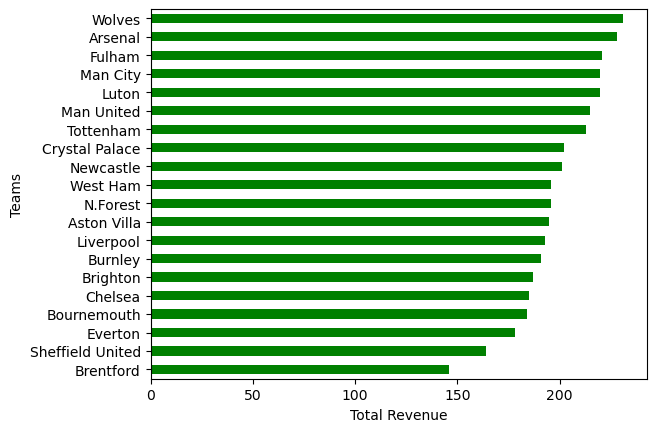

In [3]:
df[df.columns[-1]].plot(kind='barh', ylabel='Teams', xlabel='Total Revenue', color='g');


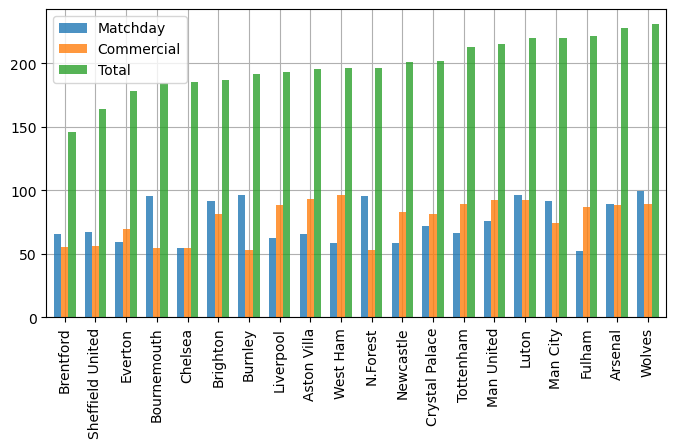

In [4]:
(df[['Matchday', 'Commercial', 'Total']]
 .sort_values(by=['Total'], ascending=True)
 .plot(kind='bar', width=.7, figsize=(8, 4), grid=True, zorder=2, alpha=.8));

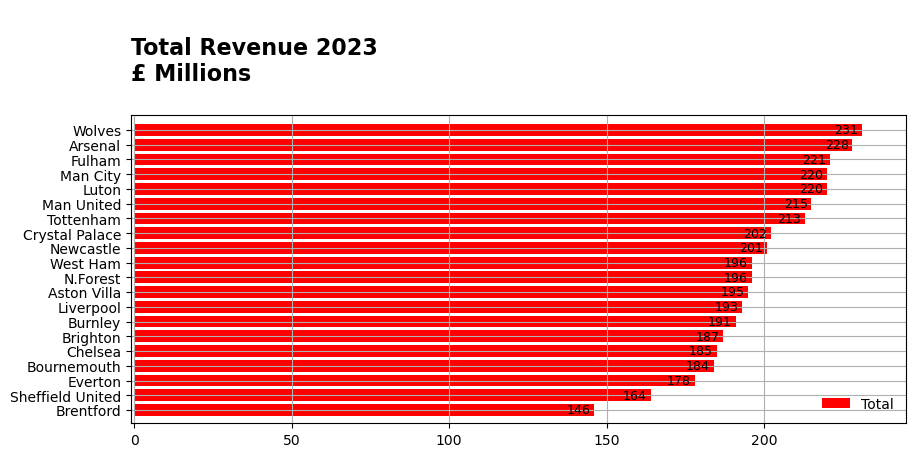

In [5]:
# %matplotlib qt
fig, ax = plt.subplots(figsize=(10,4))

tot = ax.barh(df.index, df[df.columns[-1]], color='r', label='Total')
ax.bar_label(tot, label_type='edge', padding=-20, color='black', fontsize=9, zorder=3)
ax.grid()
ax.set_xlim(-1, 245)
ax.set_ylim(-.9, 20)
plt.legend(loc='lower right', frameon=False)
plt.title('\nTotal Revenue 2023\n£ Millions\n', loc='left', fontweight='bold', fontsize=16)
plt.show()


In [6]:
df

,Matchday,Commercial,Broadcast,Wages,Total
Brentford,65,55,59,33,146
Sheffield United,67,56,56,15,164
Everton,59,69,68,18,178
Bournemouth,95,54,56,21,184
Chelsea,54,54,93,16,185
Brighton,91,81,51,36,187
Burnley,96,53,69,27,191
Liverpool,62,88,82,39,193
Aston Villa,65,93,76,39,195
N.Forest,95,53,84,36,196


In [7]:
income = df[df.columns[[0,1,2]]]

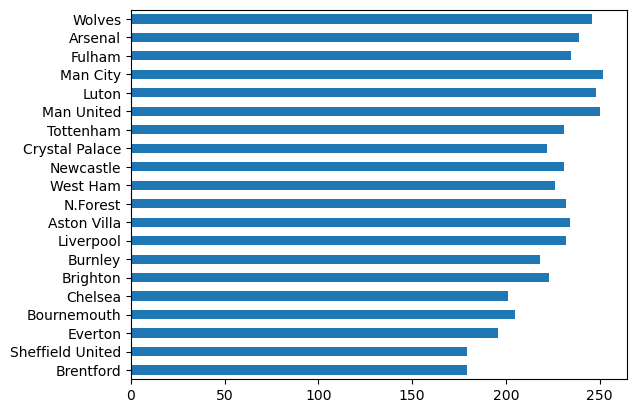

In [8]:
income.sum(axis=1).plot(kind='barh');

In [9]:
df = df.drop(columns=['Wages', 'Total'])
df

,Matchday,Commercial,Broadcast
Brentford,65,55,59
Sheffield United,67,56,56
Everton,59,69,68
Bournemouth,95,54,56
Chelsea,54,54,93
Brighton,91,81,51
Burnley,96,53,69
Liverpool,62,88,82
Aston Villa,65,93,76
N.Forest,95,53,84


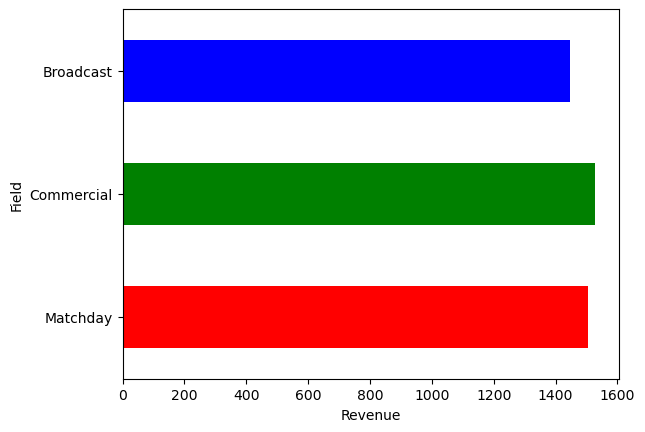

In [10]:
df.sum(axis=0).plot(kind='barh', xlabel='Revenue', ylabel='Field', color=['r', 'g', 'b']);

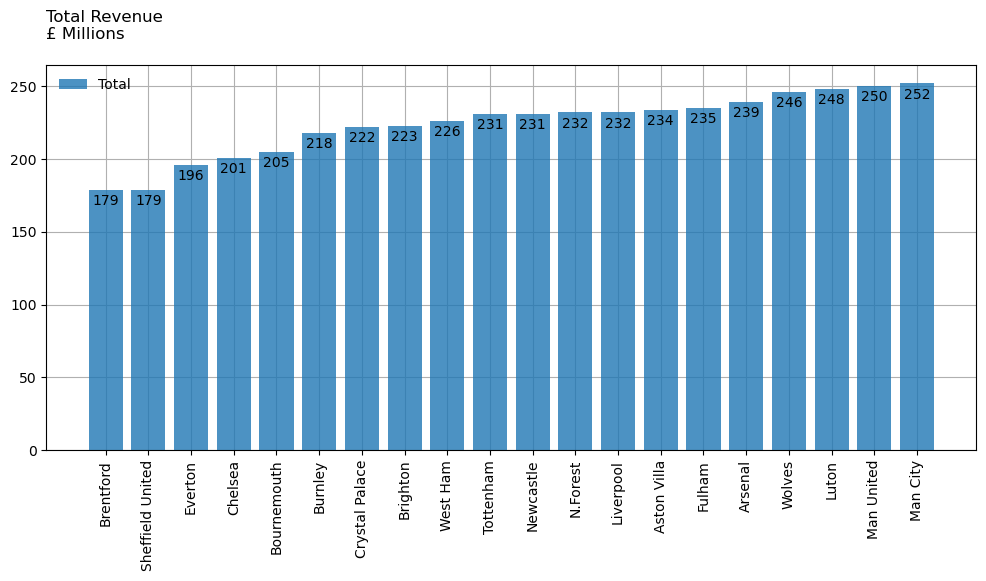

In [11]:
summa = df.sum(axis= 1).sort_values()

fig, ax = plt.subplots(figsize=(12,5))


c = ax.bar(summa.index, summa.values, label='Total', zorder=2, alpha=.8)
ax.bar_label(c, padding=-13)
ax.set_xticks(summa.index)
ax.set_xticklabels(summa.index, rotation=90)
ax.legend(frameon=False)
ax.set_title('Total Revenue\n£ Millions\n', loc='left')
ax.grid()
plt.show()